In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [48]:
# use pandas as read data as a dataframe
df=pd.read_csv('housing_price_dataset.csv')

print(f'Shape: {df.shape} \n')
df.info

Shape: (50000, 6) 



<bound method DataFrame.info of        SquareFeet  Bedrooms  Bathrooms Neighborhood  YearBuilt          Price
0            2126         4          1        Rural       1969  215355.283618
1            2459         3          2        Rural       1980  195014.221626
2            1860         2          1       Suburb       1970  306891.012076
3            2294         2          1        Urban       1996  206786.787153
4            2130         5          2       Suburb       2001  272436.239065
...           ...       ...        ...          ...        ...            ...
49995        1282         5          3        Rural       1975  100080.865895
49996        2854         2          2       Suburb       1988  374507.656727
49997        2979         5          3       Suburb       1962  384110.555590
49998        2596         5          2        Rural       1984  380512.685957
49999        1572         5          3        Rural       2011  221618.583218

[50000 rows x 6 columns]>

In [49]:
df.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


In [50]:
df.describe()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2006.374680,3.498700,1.995420,1985.404420,224827.325151
std,575.513241,1.116326,0.815851,20.719377,76141.842966
min,1000.000000,2.000000,1.000000,1950.000000,-36588.165397
25%,1513.000000,3.000000,1.000000,1967.000000,169955.860225
50%,2007.000000,3.000000,2.000000,1985.000000,225052.141166
75%,2506.000000,4.000000,3.000000,2003.000000,279373.630052
max,2999.000000,5.000000,3.000000,2021.000000,492195.259972


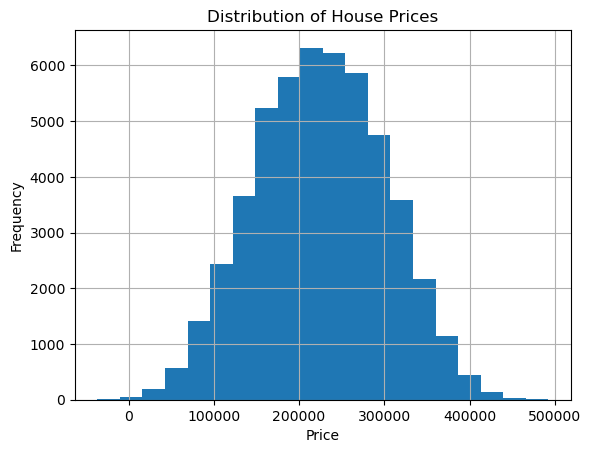

In [51]:
# Plot histogram to visualize distribution of 'Price'
df['Price'].hist(bins=20)

# Add labels and a title
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of House Prices');

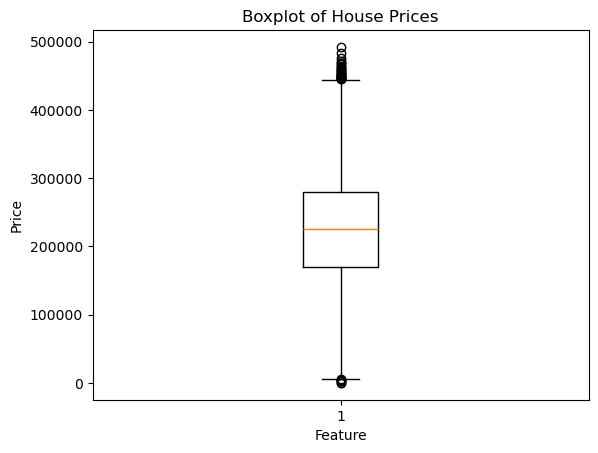

In [52]:
df = df[df['Price'] > 0]

# Plot a boxplot of the price column
plt.boxplot(df['Price'])

# Add labels and a title
plt.xlabel('Feature')
plt.ylabel('Price')
plt.title('Boxplot of House Prices');

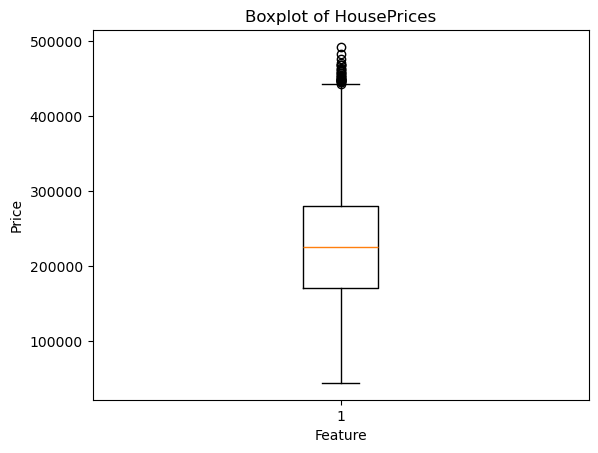

In [53]:
# Define percentilles where you want to trim data
lower_bound = df['Price'].quantile(0.005) #0.5%
upper_bound = df['Price'].quantile(0.995)

# Make a subset of the trimmed dataframe
df =df[(df['Price'] >= lower_bound)]

# Plot a boxplot of the Price column
plt.boxplot(df['Price'])

# Add labels and a title
plt.xlabel('Feature')
plt.ylabel('Price')
plt.title('Boxplot of HousePrices');

In [54]:
df.describe()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price
count,49728.000000,49728.000000,49728.000000,49728.000000,49728.000000
mean,2010.859455,3.500543,1.995817,1985.396417,225911.937021
std,573.733434,1.116173,0.815853,20.718703,74910.919391
min,1000.000000,2.000000,1.000000,1950.000000,44328.569646
25%,1520.000000,3.000000,1.000000,1967.000000,170839.645663
50%,2013.000000,3.000000,2.000000,1985.000000,225568.377192
75%,2508.000000,4.000000,3.000000,2003.000000,279762.550031
max,2999.000000,5.000000,3.000000,2021.000000,492195.259972


In [55]:
# See what unique neigbourhood are
neighbourhood_unique=df['Neighborhood'].unique()
print(f'Unique Neighbourhoods are:{neighbourhood_unique}')


Unique Neighbourhoods are:['Rural' 'Suburb' 'Urban']


In [56]:
# Check distribution of 'Neighborhood'
df['Neighborhood'].value_counts(normalize=True)

Neighborhood
Suburb    0.334459
Rural     0.333595
Urban     0.331946
Name: proportion, dtype: float64

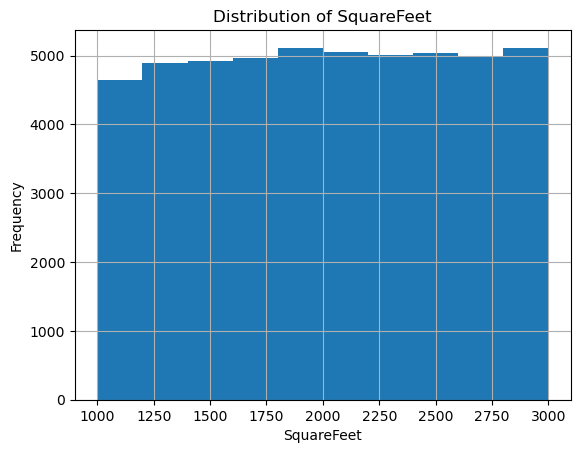

In [57]:
# Histogram for SquareFeet
df['SquareFeet'].hist()

# Add labels and a title
plt.xlabel('SquareFeet')
plt.ylabel('Frequency')
plt.title('Distribution of SquareFeet');

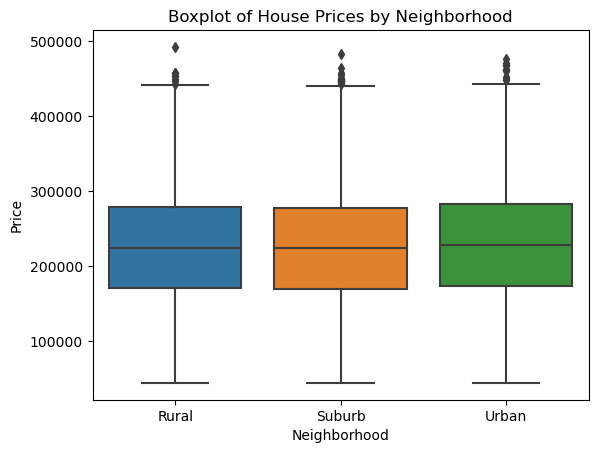

In [58]:
# Plot price by neighbourhood
sns.boxplot(x='Neighborhood', y='Price', data=df)

# Add labels and a title
plt.xlabel('Neighborhood')
plt.ylabel('Price')
plt.title('Boxplot of House Prices by Neighborhood');

In [59]:
df_rural= df[df['Neighborhood'] == 'Rural']
df_rural.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
7,2044,4,3,Rural,1957,184992.321268
16,2123,5,2,Rural,1956,190773.148563
19,1130,4,3,Rural,1962,143050.201782


            SquareFeet  Bedrooms  Bathrooms  YearBuilt     Price
SquareFeet    1.000000 -0.005071  -0.003997   0.001032  0.748765
Bedrooms     -0.005071  1.000000   0.007445   0.002914  0.069898
Bathrooms    -0.003997  0.007445   1.000000   0.003780  0.027637
YearBuilt     0.001032  0.002914   0.003780   1.000000 -0.001357
Price         0.748765  0.069898   0.027637  -0.001357  1.000000


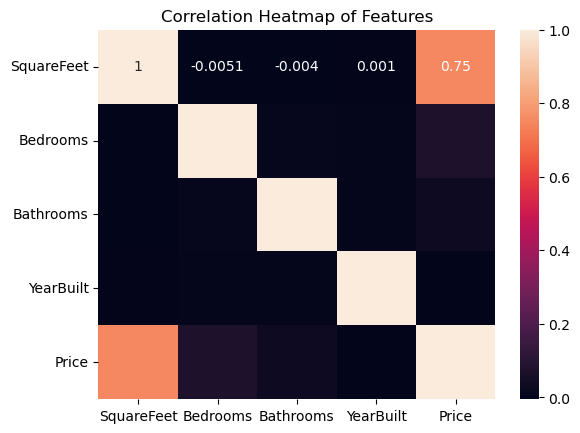

In [60]:
# Correlation Heatmap Of features
# Select numeric columns
numeric_df = df.select_dtypes(include=[int,float])#.drop(columns='Price')

# Calculate correlation matrix
corr = numeric_df.corr()
print(corr)

# Plot heatmap
sns.heatmap(corr,annot=True)

# Add a title
plt.title('Correlation Heatmap of Features');

In [61]:

# split data into Feature Matrix (X) and Target Vector (y)
X = df[["SquareFeet"]]
y = df["Price"]
print(X.shape)
print(y.shape)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

(49728, 1)
(49728,)
X_train shape: (39782, 1)
y_train shape: (39782,)
X_test shape: (9946, 1)
y_test shape: (9946,)


In [62]:
y_mean = y_train.mean()
y_pred_baseline = [y_mean] * len(y_train)
baseline_mae = mean_absolute_error(y_train, y_pred_baseline)

print("Baseline MAE:", baseline_mae.round(2))

Baseline MAE: 61389.65


In [63]:

import time

# Initialize the linear regression model
model = LinearRegression()

start_time = time.time()

# Fit Model
model.fit(X_train, y_train)

end_time = time.time()

# Calculate the training time
training_time = end_time - start_time

print(f"Training time: {int(training_time / 60)} minutes and {int(training_time % 60)} seconds")

Training time: 0 minutes and 0 seconds


In [64]:
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate using Mean Absolute Error (MAE)
test_mae = mean_absolute_error(y_test, y_pred)
print(f'Test MAE: {test_mae.round(2)}')

Test MAE: 39431.36


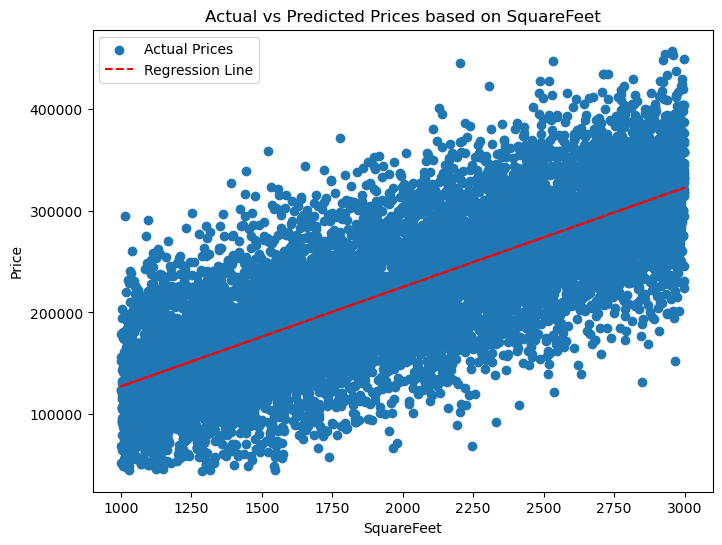

In [65]:


# Plot results including a regression line
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, label="Actual Prices")
plt.plot(X_test, y_pred, color="red", linestyle="--", label="Regression Line")
plt.xlabel("SquareFeet")
plt.ylabel("Price")
plt.title("Actual vs Predicted Prices based on SquareFeet")
plt.legend();